In [48]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(RColorBrewer)


set.seed(3456)


`age`: age in years

`sex`: sex (1 = male; 0 = female)

`cp`: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

`trestbps`: resting blood pressure (in mm Hg on admission to the hospital)

`chol`: serum cholestoral in mg/dl

`fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

`restecg`: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach`: maximum heart rate achieved

`exang`: exercise induced angina (1 = yes; 0 = no)

`oldpeak` = ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

`ca`: number of major vessels (0-3) colored by flourosopy

`thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

`num`: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing (Normal)-- Value 1: > 50% diameter narrowing (Abnormal)

In [22]:
#Demonstration that the dataset can be read from the web into R and cleaning and wrangling our data into a tidy format.
H_D_cleveland <- read_csv("https://raw.githubusercontent.com/TimWei12/Group_25_project/main/processed.cleveland.data",
                          col_names=c("age", "sex", "cp","trestbps", "chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    filter(ca != "?" & thal != "?") |>
    filter(num == 1 | num == 0) |>
    mutate(num = as.factor(num), ca = as.double(ca), thal = as.double(thal)) |>
    mutate(num = fct_recode(num, "Normal" = "0", "Abnormal" = "1"))
H_D_cleveland
# , ca = as.double(ca), thal = as.double(thal)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Normal
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Abnormal
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Normal
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Normal
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Normal
57,0,4,120,354,0,0,163,1,0.6,1,0,3,Normal
53,1,4,140,203,1,2,155,1,3.1,3,0,7,Abnormal
57,1,4,140,192,0,0,148,0,0.4,2,0,6,Normal
56,0,2,140,294,0,2,153,0,1.3,2,0,3,Normal


In [23]:
HD_cleveland_scale <- recipe(num ~ ., data=H_D_cleveland) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

HD_cleveland_scaled <- HD_cleveland_scale |>  
                           prep() |> 
                           bake(H_D_cleveland)

# recipe(fruit_name ~ mass + width + height + color_score, data = H_D_cleveland) |>
#                        step_scale(all_predictors()) |>
#                        step_center(all_predictors())

In [61]:
#split the dataset into the training dataset and testing dataset
set.seed(4567)
cleveland_split_scaled <- initial_split(HD_cleveland_scaled, prop = 0.75, strata = num)  
cleveland_train_scaled <- training(cleveland_split_scaled)   
cleveland_test_scaled <- testing(cleveland_split_scaled)

In [73]:
#all the variables
set.seed(9999)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_recipe <- recipe(num ~ ., data = cleveland_train_scaled)

k_vfold <- vfold_cv(cleveland_train_scaled, v=5, strata = num)
k_val <- tibble(neighbors = seq(from=1, to=20))

knn_fit <- workflow() |>
         add_recipe(knn_recipe) |>
         add_model(knn_spec) |>
        tune_grid(resamples = k_vfold, grid = k_val)


In [93]:
k_best <- knn_fit |>
        collect_metrics() |>
        filter(.metric == "accuracy") 
        # arrange(mean) |>
        # select(neighbors) |>
        # tail(1) |>
        # pull()

In [26]:
 #install.packages("kknn")

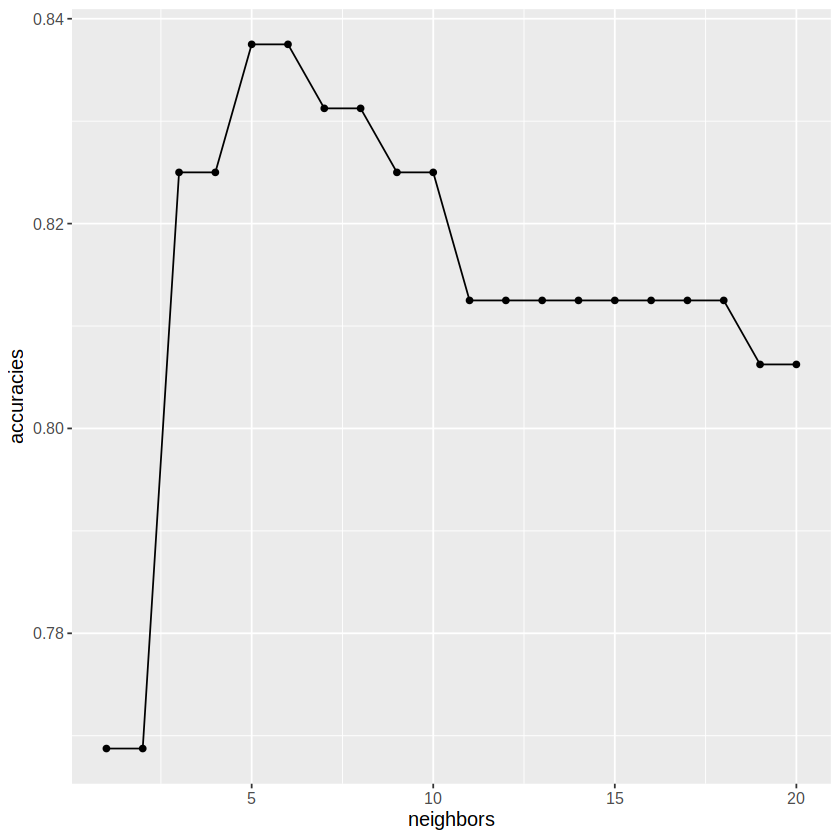

In [94]:
k_best_plot_1 <- k_best |>
                ggplot(aes(x=neighbors, y=mean))+
                       geom_point()+
                        geom_line()+
                        labs(x="neighbors", y="accuracies")+
                        theme(text=element_text(size=12)) +
                        xlim(c(1, 20))
k_best_plot_1

from the scatter plot we can see the best value might be from 13 to 20, so, we pick K=16 since increase or decrease in a small amount the accuracy would change much. 

In [75]:
knn_spec_bestK_all <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit_bestK_all <- workflow() |>
        add_recipe(knn_recipe) |>
        add_model(knn_spec_bestK_all) |>
        fit(data=cleveland_train_scaled)

prediction_all <- predict(knn_fit_bestK_all, cleveland_test_scaled) |>
                bind_cols(cleveland_test_scaled)
                 
accuracy_all <- prediction_all |> metrics(truth=num, estimate=.pred_class) |>
                filter(.metric == "accuracy")
accuracy_all

confusion_all <- prediction_all |>
                conf_mat(truth=num, estimate=.pred_class)
confusion_all

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7962963


          Truth
Prediction Normal Abnormal
  Normal       36        7
  Abnormal      4        7

In [89]:
#Two variable-trestbps + chol
set.seed(9999)

knn_recipe_two <- recipe(num ~ trestbps+chol, data = cleveland_train_scaled)

knn_fit_two <- workflow() |>
         add_recipe(knn_recipe_two) |>
         add_model(knn_spec) |>
        tune_grid(resamples = k_vfold, grid = k_val)

In [90]:
k_best_two <- knn_fit_two |>
        collect_metrics() |>
        filter(.metric == "accuracy") 

        #  arrange(mean) |>
        # select(neighbors) |>
        # tail(1) |>
        # pull()

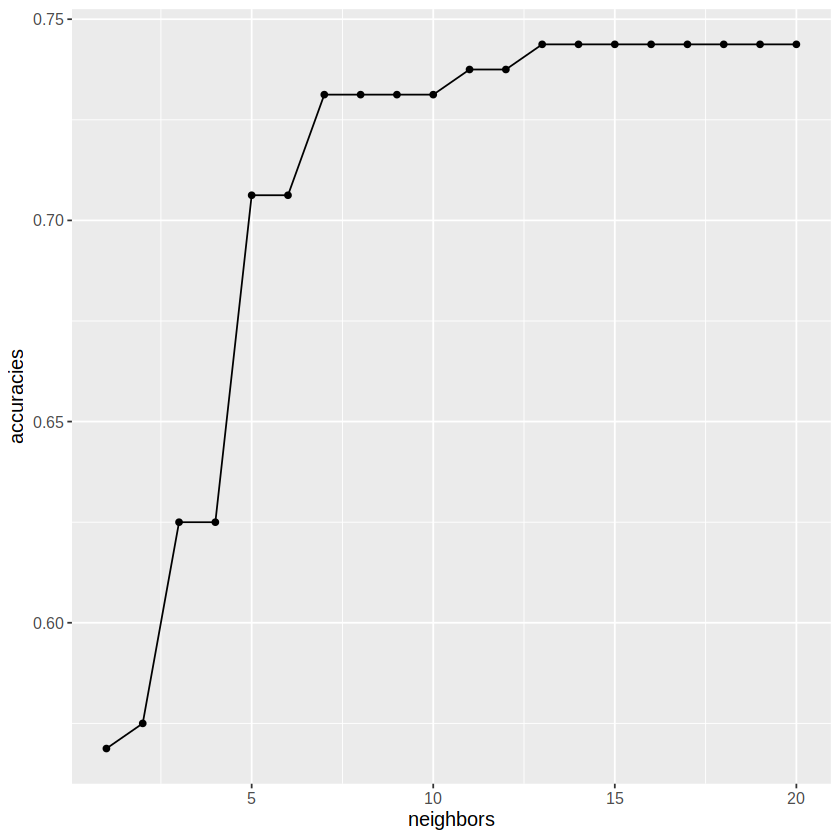

In [91]:
k_best_plot_2 <- k_best_two |>
                ggplot(aes(x=neighbors, y=mean))+
                       geom_point()+
                        geom_line()+
                        labs(x="neighbors", y="accuracies")+
                        theme(text=element_text(size=12)) +
                        xlim(c(1, 20))
k_best_plot_2

In [83]:
knn_spec_bestK_two <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit_bestK_two <- workflow() |>
        add_recipe(knn_recipe_two) |>
        add_model(knn_spec_bestK_two) |>
        fit(data=cleveland_train_scaled)

prediction_two <- predict(knn_fit_bestK_two, cleveland_test_scaled) |>
                bind_cols(cleveland_test_scaled)
                 
accuracy_two <- prediction_two |> metrics(truth=num, estimate=.pred_class) |>
                filter(.metric == "accuracy")
accuracy_two

confusion_two <- prediction_two |>
                conf_mat(truth=num, estimate=.pred_class)
confusion_two

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7407407


          Truth
Prediction Normal Abnormal
  Normal       39       13
  Abnormal      1        1

In [84]:
#one variable-trestbps+thalach
set.seed(9999)

knn_recipe_two2 <- recipe(num ~ trestbps+thalach, data = cleveland_train_scaled)

knn_fit_two2 <- workflow() |>
         add_recipe(knn_recipe_two2) |>
         add_model(knn_spec) |>
        tune_grid(resamples = k_vfold, grid = k_val)

In [85]:
k_best_two2 <- knn_fit_two2 |>
        collect_metrics() |>
        filter(.metric == "accuracy") 

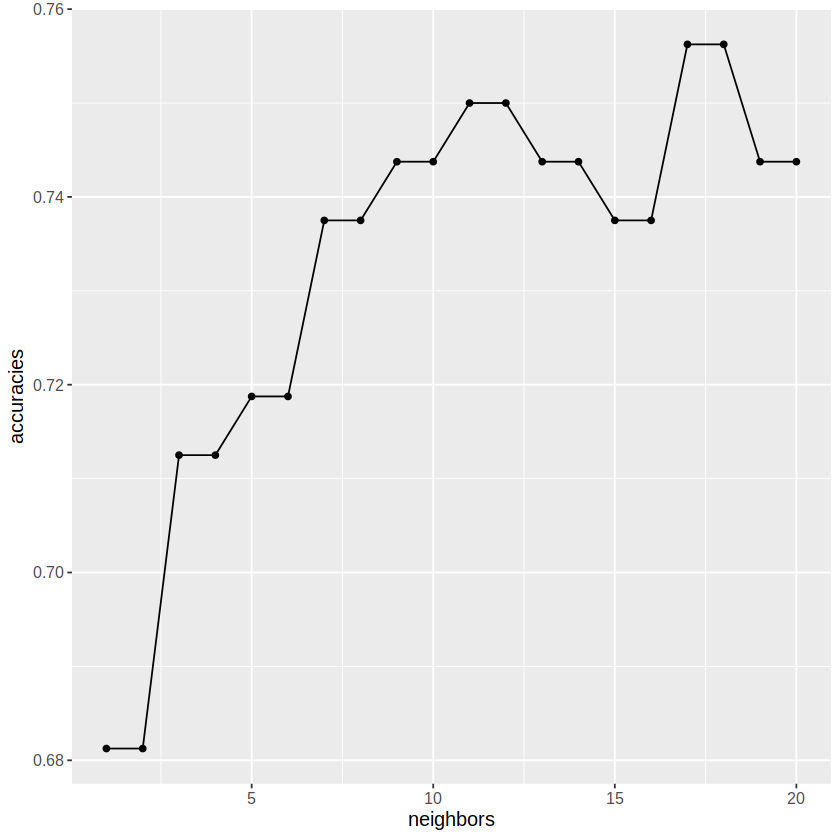

In [86]:
k_best_plot_3 <- k_best_two2 |>
                ggplot(aes(x=neighbors, y=mean))+
                       geom_point()+
                        geom_line()+
                        labs(x="neighbors", y="accuracies")+
                        theme(text=element_text(size=12)) +
                        xlim(c(1, 20))
k_best_plot_3

In [87]:
knn_spec_bestK_two2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit_bestK_two2 <- workflow() |>
        add_recipe(knn_recipe_two2) |>
        add_model(knn_spec_bestK_two2) |>
        fit(data=cleveland_train_scaled)

prediction_two2 <- predict(knn_fit_bestK_two2, cleveland_test_scaled) |>
                bind_cols(cleveland_test_scaled)
                 
accuracy_two2 <- prediction_two2 |> metrics(truth=num, estimate=.pred_class) |>
                filter(.metric == "accuracy")
accuracy_two2

confusion_two2 <- prediction_two2 |>
                conf_mat(truth=num, estimate=.pred_class)
confusion_two2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7037037


          Truth
Prediction Normal Abnormal
  Normal       35       11
  Abnormal      5        3